# ***Advanced Classification Predict***

Daniel Komape
Ulanda wilcocks
Maphuti Rose Ntsewa
Aphiwe Madela
Lesego Phaahla
Kay Khoza
I am Praise


# **Predict Overview: 2022 Climate Change Belief Analysis**

Many companies are built around lessening one’s environmental impact or carbon footprint. They offer products and services that are environmentally friendly and sustainable, in line with their values and ideals. They would like to determine how people perceive climate change and whether or not they believe it is a real threat. This would add to their market research efforts in gauging how their product/service may be received.

With this context, EDSA is challenging you during the Classification Sprint with the task of creating a Machine Learning model that is able to classify whether or not a person believes in climate change, based on their novel tweet data.

Providing an accurate and robust solution to this task gives companies access to a broad base of consumer sentiment, spanning multiple demographic and geographic categories - thus increasing their insights and informing future marketing strategies.






# **Problem statement**




  Build a robust Machine Learning Model that will be able to predict a person’s belief in Climate Change based on their Tweet Data, allowing companies to gain access into customer sentiment.

---
The business problem we are pitching to solve involves a fictional line of clothing sourced from sustainable and/or recycled sources that Woolworths is considering investing in. This will likely require a significant amount of capital expenditure and risk, with the need for novel material sourcing and production techniques likely increasing costs further. We are offering a machine learning platform that can determine customer sentiment about climate change based on tweets, large numbers of users and/or customers who express their belief that climate change is real and caused by humans may be significantly more likely to pay attention to (and consider purchasing) this new line of clothing if it were launched.



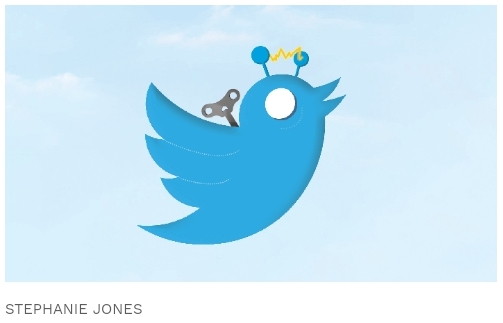

#  **Table of Contents**

1. Importing Packages

2. Loading Data

3. Exploratory Data Analysis (EDA)

4. Data Engineering

5. Modeling

6. Model Performance

7. Model Explanations

# 1. **Importing Packages**

Back to Table of Contents

In [51]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
pip install comet_ml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
from comet_ml import Experiment
experiment = Experiment(
    api_key="7esK2mYOrsTzoix3Q4ZQ8JgyA",
    project_name="js5",
    workspace="ulanda-wilcocks",
)

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET ERROR: Failed to calculate active processors count. Fall back to default CPU count 1
COMET INFO: Couldn't find a Git repository in '/content' nor in any parent directory. You can override where Comet is looking for a Git Patch by setting the configuration `COMET_GIT_DIRECTORY`
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/ulanda-wilcocks/js5/c0a144e0f9a14324949f83a379dea9f9



In [1]:
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from matplotlib.colors import ListedColormap
%matplotlib inline

# imports for Natural Language  Processing
import re
import os
import nltk
import time
import numpy as np
import pandas as pd
#import xgboost
from sklearn import metrics
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
nltk.download('stopwords')
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
from nltk.util import ngrams

# Classification Models

from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import ComplementNB

# Performance Evaluation
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
#from scikitplot.metrics import plot_roc, plot_confusion_matrix
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, classification_report, confusion_matrix

# Import library for train test split
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV

#Resampling techniques -- not used here, but did try them.
from collections import Counter 
from sklearn.utils import resample
#from imblearn.over_sampling import SMOTE

# Ignore warnings
import warnings
warnings.simplefilter(action='ignore')

#spacy
#spacy.cli.download('en_core_web_sm')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# 2. **Loading the Data**

## Back to Table of Contents

df_train: Dataframe that contains all the observations (tweets) used to train and test the model

df_test : Dataframe that contains all the observations (tweets) used to make Kaggle predictions

In [2]:
df_test = pd.read_csv('https://raw.githubusercontent.com/mohau45/Classification-predict/main/test_with_no_labels.csv')
df_train = pd.read_csv('https://raw.githubusercontent.com/mohau45/Classification-predict/main/train.csv')

# 3. **Exploratory Data Analysis (EDA)**

In [3]:
df_train.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


In [4]:
df_train.shape

(15819, 3)

In [5]:
df_train.isnull().sum()

sentiment    0
message      0
tweetid      0
dtype: int64

In [6]:
from copy import deepcopy
df_train = deepcopy(df_train)

In [7]:
sentiment_num2name = {
    -1: "Anti",
     0: "Neutral",
     1: "Pro",
     2: "News",
}
df_train["sentiment"] = df_train["sentiment"].apply(lambda num: sentiment_num2name[num])
df_train.head()

,sentiment,message,tweetid
0,Pro,PolySciMajor EPA chief doesn't think carbon di...,625221
1,Pro,It's not like we lack evidence of anthropogeni...,126103
2,News,RT @RawStory: Researchers say we have three ye...,698562
3,Pro,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,Pro,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


In [8]:
from matplotlib import pyplot as plt
from matplotlib import style

import seaborn as sns

sns.set(font_scale=1.5)
style.use("seaborn-poster")

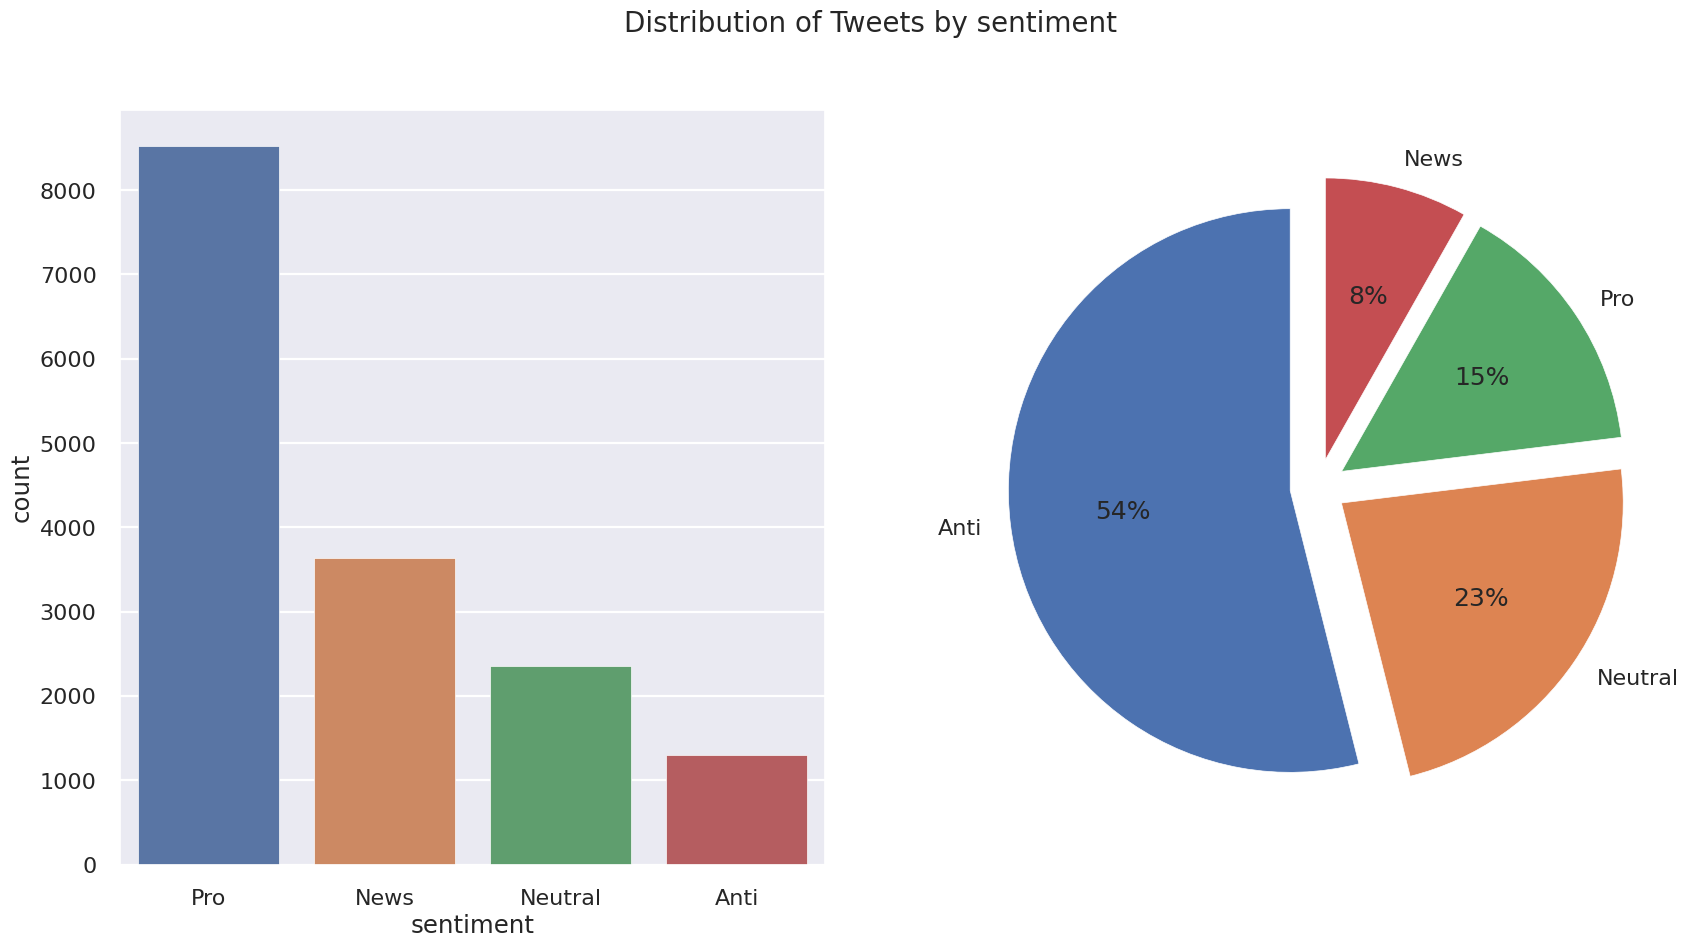

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10), dpi=100)

sns.countplot(df_train["sentiment"], ax=axes[0])
labels = list(sentiment_num2name.values())

axes[1].pie(df_train["sentiment"].value_counts(),
            labels=labels,
            autopct="%1.0f%%",
            startangle=90,
            explode=tuple([0.1] * len(labels)))

fig.suptitle("Distribution of Tweets by sentiment", fontsize=20)
plt.show()

In [10]:
tweet_df = df_train["message"]

# 4.**Data Engineering**

In [11]:
def cleaner(tweet):
    tweet = tweet.lower()
    
    to_del = [
        r"@[\w]*",  # strip account mentions
        r"http(s?):\/\/.*\/\w*",  # strip URLs
        r"#\w*",  # strip hashtags
        r"\d+",  # delete numeric values
        r"U+FFFD",  # remove the "character note present" diamond
    ]
    for key in to_del:
        tweet = re.sub(key, "", tweet)
    
    # strip punctuation and special characters
    tweet = re.sub(r"[,.;':@#?!\&/$]+\ *", " ", tweet)
    # strip excess white-space
    tweet = re.sub(r"\s\s+", " ", tweet)

    return tweet.lstrip(" ")

In [12]:
df_train["message"] = df_train["message"].apply(cleaner)
df_train.head()

,sentiment,message,tweetid
0,Pro,polyscimajor epa chief doesn t think carbon di...,625221
1,Pro,it s not like we lack evidence of anthropogeni...,126103
2,News,rt researchers say we have three years to act ...,698562
3,Pro,wired was a pivotal year in the war on climate...,573736
4,Pro,rt it s and a racist sexist climate change den...,466954


In [13]:
from IPython.display import (
    Markdown as md,
    Latex,
    HTML,
)
from tqdm.auto import tqdm

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

In [15]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords, wordnet 

In [16]:
def lemmatizer(df):
    df["length"] = df["message"].str.len()
    df["tokenized"] = df["message"].apply(word_tokenize)
    df["parts-of-speech"] = df["tokenized"].apply(nltk.tag.pos_tag)
    
    def str2wordnet(tag):
        conversion = {"J": wordnet.ADJ, "V": wordnet.VERB, "N": wordnet.NOUN, "R": wordnet.ADV}
        try:
            return conversion[tag[0].upper()]
        except KeyError:
            return wordnet.NOUN
    
    wnl = WordNetLemmatizer()
    df["parts-of-speech"] = df["parts-of-speech"].apply(
        lambda tokens: [(word, str2wordnet(tag)) for word, tag in tokens]
    )
    df["lemmatized"] = df["parts-of-speech"].apply(
        lambda tokens: [wnl.lemmatize(word, tag) for word, tag in tokens]
    )
    df["lemmatized"] = df["lemmatized"].apply(lambda tokens: " ".join(map(str, tokens)))
    
    return df

In [17]:
import nltk
nltk.download('punkt')
import nltk
nltk.download('wordnet')
import nltk
nltk.download('omw-1.4')
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Unzipping corpora/omw-1.4.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [18]:
df_train = lemmatizer(df_train)
df_train.head()

,sentiment,message,tweetid,length,tokenized,parts-of-speech,lemmatized
0,Pro,polyscimajor epa chief doesn t think carbon di...,625221,102,"[polyscimajor, epa, chief, doesn, t, think, ca...","[(polyscimajor, a), (epa, n), (chief, n), (doe...",polyscimajor epa chief doesn t think carbon di...
1,Pro,it s not like we lack evidence of anthropogeni...,126103,62,"[it, s, not, like, we, lack, evidence, of, ant...","[(it, n), (s, v), (not, r), (like, n), (we, n)...",it s not like we lack evidence of anthropogeni...
2,News,rt researchers say we have three years to act ...,698562,86,"[rt, researchers, say, we, have, three, years,...","[(rt, n), (researchers, n), (say, v), (we, n),...",rt researcher say we have three year to act on...
3,Pro,wired was a pivotal year in the war on climate...,573736,54,"[wired, was, a, pivotal, year, in, the, war, o...","[(wired, v), (was, v), (a, n), (pivotal, a), (...",wire be a pivotal year in the war on climate c...
4,Pro,rt it s and a racist sexist climate change den...,466954,81,"[rt, it, s, and, a, racist, sexist, climate, c...","[(rt, v), (it, n), (s, n), (and, n), (a, n), (...",rt it s and a racist sexist climate change den...


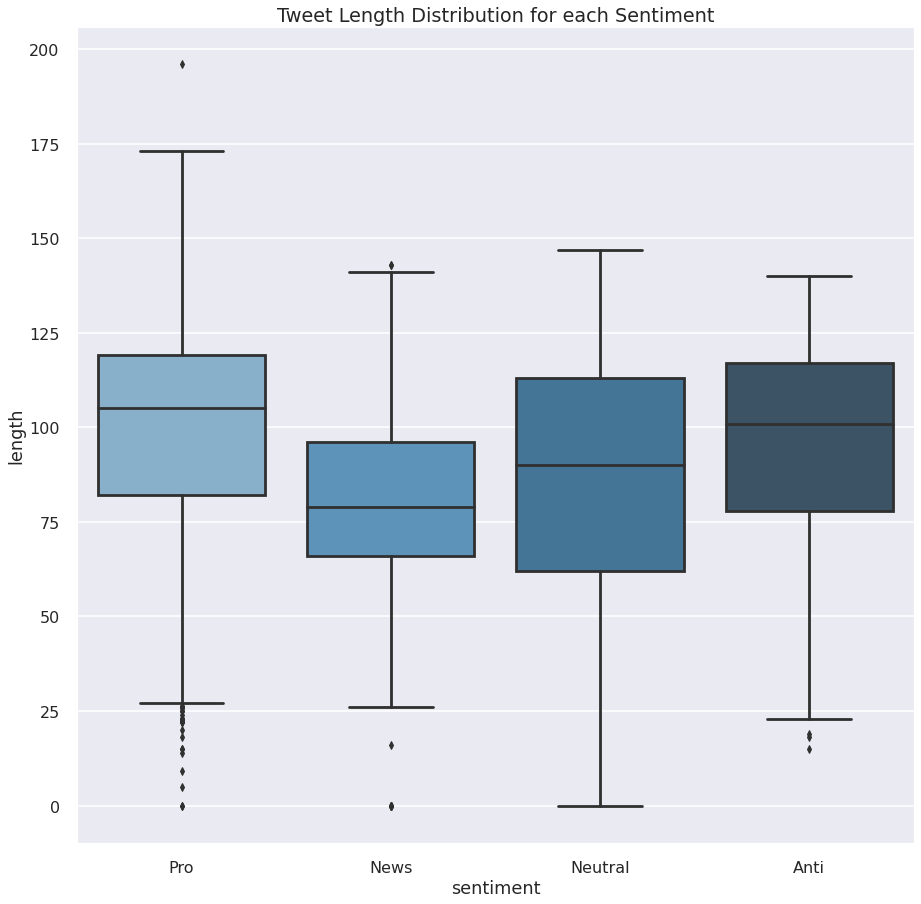

In [19]:
plt.figure(figsize=(15, 15))
sns.boxplot(x="sentiment", y="length", data=df_train, palette=("Blues_d"))
plt.title("Tweet Length Distribution for each Sentiment")
plt.show()

In [20]:
from sklearn.feature_extraction.text import CountVectorizer

In [21]:
frequency = {}

by_sentiment = df_train.groupby("sentiment")
for sentiment, group in tqdm(by_sentiment):
    cv = CountVectorizer(stop_words="english")
    words = cv.fit_transform(group["lemmatized"])
    
    n_words = words.sum(axis=0)
    word_freq = [(word, n_words[0, idx]) for word, idx in cv.vocabulary_.items()]
    word_freq = sorted(word_freq, key=lambda x: x[1], reverse=True)
    
    freq = pd.DataFrame(word_freq, columns=["word", "freq"])
    
    frequency[sentiment] = freq.head(n=25)

to_view = pd.concat(frequency, axis=1).head(n=25)
display(to_view)

  0%|          | 0/4 [00:00<?, ?it/s]

Anti       Neutral             News              Pro      
         word freq     word  freq       word  freq       word  freq
0     climate  799  climate  1431     change  3264     change  7249
1      change  786   change  1419    climate  3212    climate  7202
2          rt  684       rt  1092         rt  2150         rt  5793
3      global  639   global  1038      trump  1029     global  1605
4     warming  489  warming   861     global   509    warming  1196
5        warm  133    trump   170    warming   345    believe  1115
6        make  109     warm   168        say   336      trump  1052
7         man   96      say   141        epa   254      think   809
8         amp   91    think   120  scientist   214      doesn   710
9     science   81    cause   113        new   192        amp   695
10      cause   73      amp   112      fight   186       real   518
11        say   69  believe   104     donald   165      world   491
12       just   68     like   102      world   156        say   480
13       real   65     real    99      china   156     people   467
14  scientist   64     just    94      obama   130        die   420
15       year   64  penguin    86  president   120  president   409
16      trump   62     know    71     pruitt   118      fight   396
17     people   58   people    69       plan   113     denier   376
18    believe   58     talk    69      scott   113       just   372
19       scam   54     make    69      paris   108        don   364
20        tax   51      don    68      study   102       http   359
21       hoax   51     tell    66      chief   102       make   322
22       data   50      ask    59     energy   102       like   318
23    liberal   48      hot    53       warm    99       warm   313
24       fake   47     come    51        use    95    husband   312

  0%|          | 0/4 [00:00<?, ?it/s]

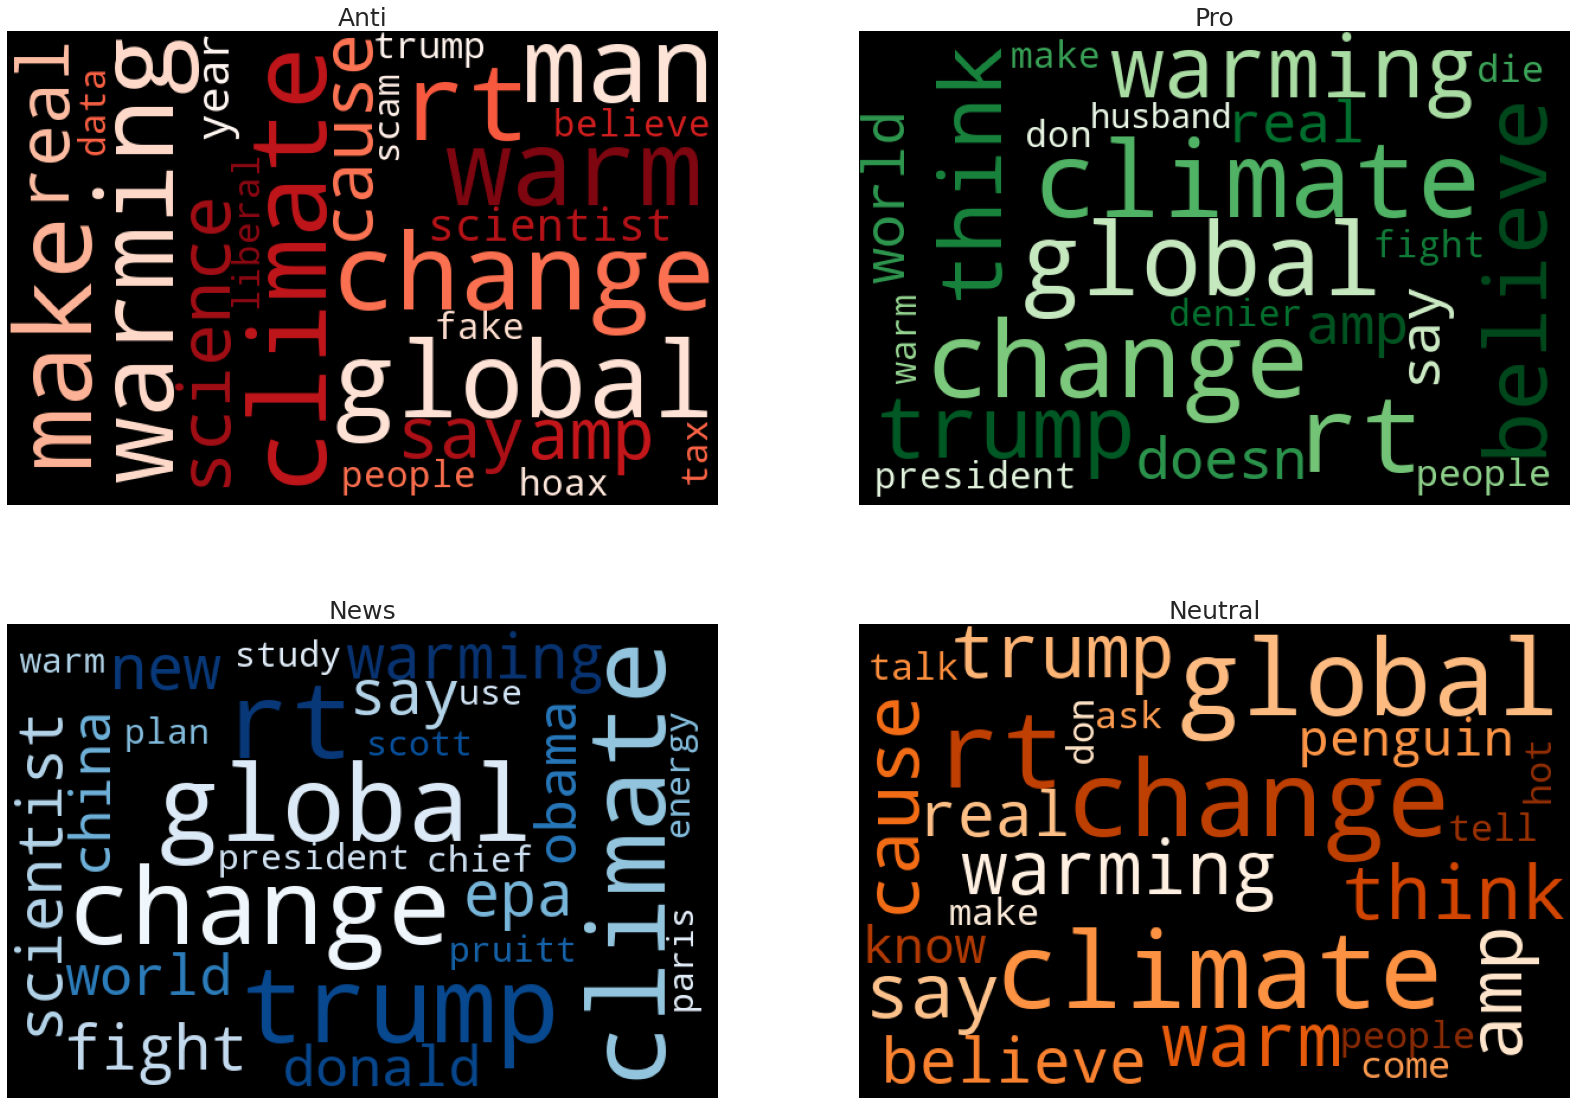

In [22]:
words = {sentiment: " ".join(frequency[sentiment]["word"].values) for sentiment in sentiment_num2name.values()}

cmaps = {
    "Anti": ("Reds", 110),
    "Pro" : ("Greens", 73),
    "News": ("Blues", 0),
    "Neutral": ("Oranges", 10),
}

from wordcloud import WordCloud

wordclouds = {}
for sentiment, (cmap, rand) in tqdm(cmaps.items()):
    wordclouds[sentiment] = WordCloud(
        width=600, height=400, random_state=rand,
        max_font_size=90, background_color="Black",
        colormap=cmap
    ).generate(words[sentiment])
    
fig, axes = plt.subplots(2, 2, figsize=(28, 20))
counter = 0

for sentiment, wordcloud in wordclouds.items():
    axes[counter // 2, counter % 2].imshow(wordcloud)
    axes[counter // 2, counter % 2].set_title(sentiment, fontsize=25)
    counter += 1
    
for ax in fig.axes:
    plt.sca(ax)
    plt.axis("off")

plt.show()

In [26]:
from sklearn.feature_extraction.text import TfidfTransformer 
from sklearn.model_selection import train_test_split, RandomizedSearchCV

In [28]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, recall_score

In [58]:
X_all = df_train["message"]
y_all = df_train["sentiment"]

X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.4, random_state=1337)

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.4, random_state=1337)

In [56]:
tfidf = TfidfVectorizer()
tfidf.fit_transform(X_train)

<1757x4596 sparse matrix of type '<class 'numpy.float64'>'
	with 25985 stored elements in Compressed Sparse Row format>

In [35]:
def train(tfidf, model, train_data, train_labels, test_data):
    model.fit(tfidf.transform(train_data), train_labels)
    preds = model.predict(tfidf.transform(test_data))
    
    return preds

In [36]:
def grade(model, preds, test_labels):
    print(metrics.classification_report(test_labels, preds))
    
    cm = confusion_matrix(test_labels, preds)
    cm_normd = cm / cm.sum(axis=1).reshape(-1, 1)
    
    heatmap_kwargs = dict(
        cmap="YlGnBu",
        xticklabels=model.classes_,
        yticklabels=model.classes_,
        vmin=0.,
        vmax=1.,
        annot=True,
        annot_kws={"size": 10},
    )
    
    sns.heatmap(cm_normd, **heatmap_kwargs)
    
    plt.title(f"{model.__class__.__name__} Classification")
    plt.ylabel("Ground-truth labels")
    plt.xlabel("Predicted labels")
    plt.plot()

In [37]:
def train_and_grade(tfidf, model, train_data, train_labels, test_data, test_labels):
    preds = train(tfidf, model, train_data, train_labels, test_data)
    grade(model, preds, test_labels)

              precision    recall  f1-score   support

        Anti       0.00      0.00      0.00       226
     Neutral       0.00      0.00      0.00       440
        News       0.00      0.00      0.00       699
         Pro       0.54      1.00      0.70      1601

    accuracy                           0.54      2966
   macro avg       0.13      0.25      0.18      2966
weighted avg       0.29      0.54      0.38      2966



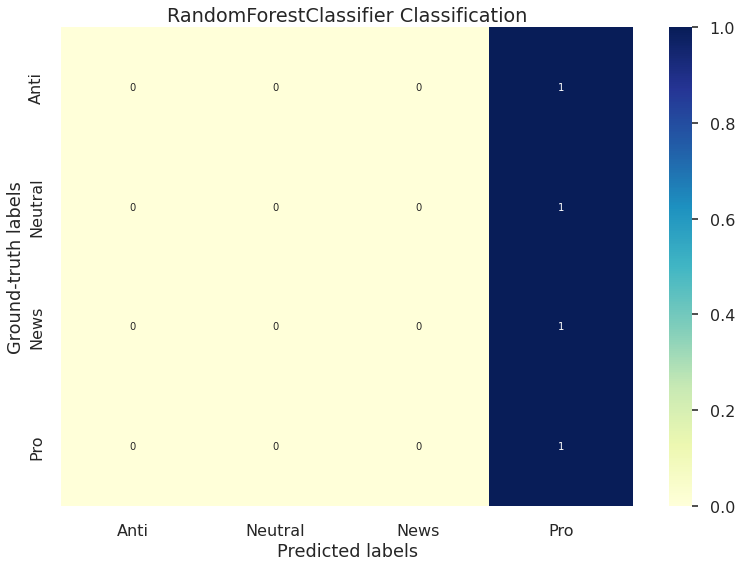

In [38]:
rf = RandomForestClassifier(max_depth=5, n_estimators=100)
train_and_grade(tfidf, rf, X_train, y_train, X_valid, y_valid)

              precision    recall  f1-score   support

        Anti       0.00      0.00      0.00       226
     Neutral       1.00      0.04      0.08       440
        News       0.88      0.38      0.53       699
         Pro       0.60      0.99      0.74      1601

    accuracy                           0.63      2966
   macro avg       0.62      0.35      0.34      2966
weighted avg       0.68      0.63      0.54      2966



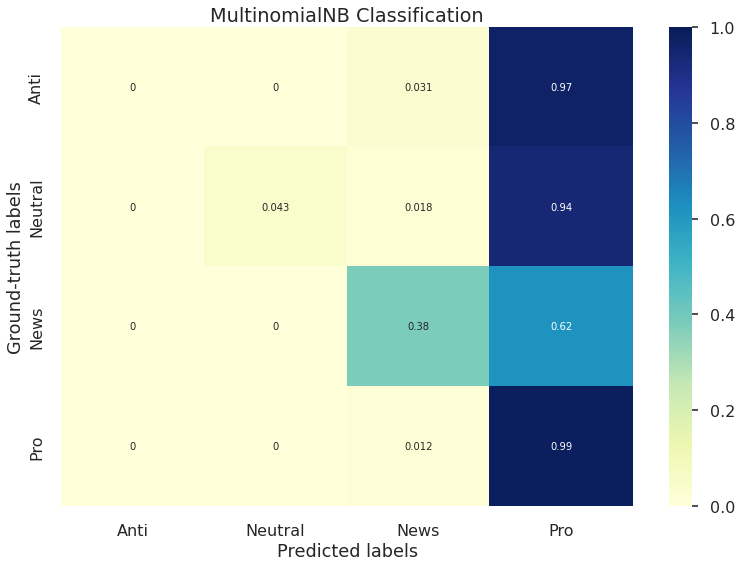

In [39]:
nb = MultinomialNB()
train_and_grade(tfidf, nb, X_train, y_train, X_valid, y_valid)

              precision    recall  f1-score   support

        Anti       0.91      0.04      0.08       226
     Neutral       0.87      0.10      0.19       440
        News       0.27      0.99      0.42       699
         Pro       0.95      0.17      0.29      1601

    accuracy                           0.34      2966
   macro avg       0.75      0.33      0.24      2966
weighted avg       0.77      0.34      0.29      2966



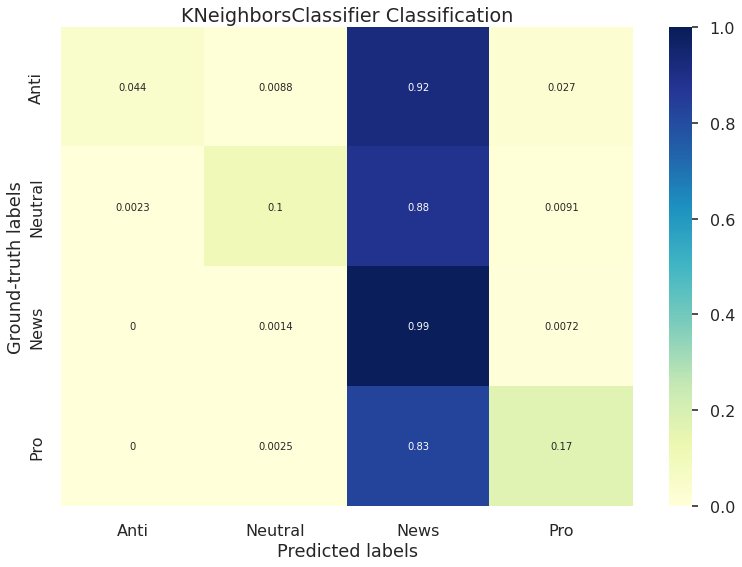

In [40]:
knn = KNeighborsClassifier(n_neighbors=5, metric="minkowski", p=2)
train_and_grade(tfidf, knn, X_train, y_train, X_valid, y_valid)

              precision    recall  f1-score   support

        Anti       0.43      0.55      0.48       226
     Neutral       0.45      0.55      0.49       440
        News       0.67      0.84      0.74       699
         Pro       0.84      0.67      0.75      1601

    accuracy                           0.68      2966
   macro avg       0.60      0.65      0.62      2966
weighted avg       0.71      0.68      0.69      2966



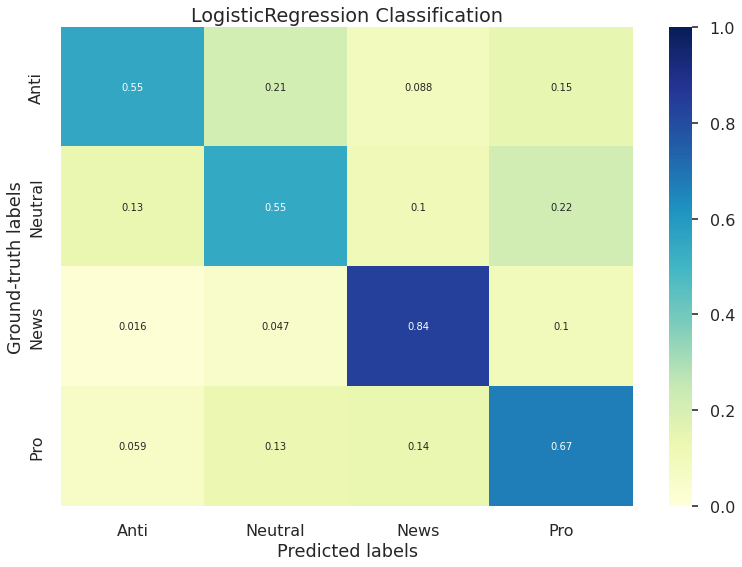

In [41]:
logreg = LogisticRegression(C=1, class_weight="balanced", max_iter=1000)
train_and_grade(tfidf, logreg, X_train, y_train, X_valid, y_valid)

              precision    recall  f1-score   support

        Anti       0.52      0.49      0.50       226
     Neutral       0.51      0.46      0.48       440
        News       0.70      0.78      0.74       699
         Pro       0.79      0.78      0.78      1601

    accuracy                           0.71      2966
   macro avg       0.63      0.63      0.63      2966
weighted avg       0.70      0.71      0.71      2966



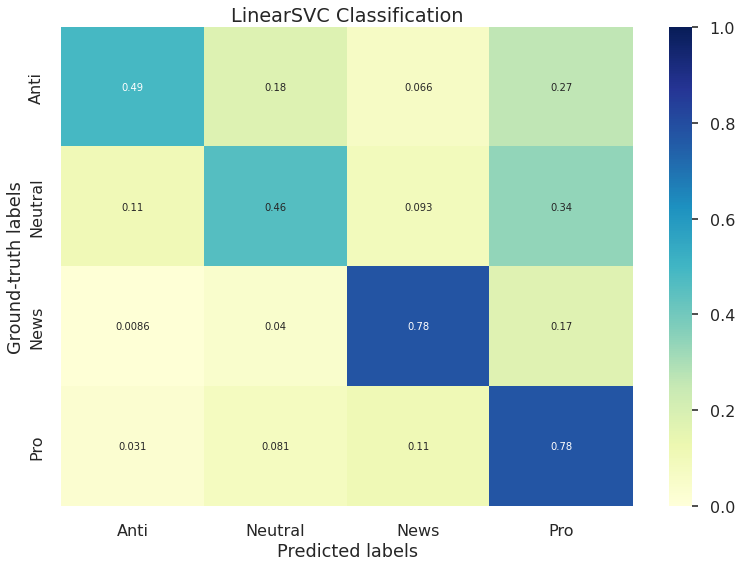

In [48]:
svm_lsvc = LinearSVC(class_weight="balanced")
train_and_grade(tfidf, svm_lsvc, X_train, y_train, X_valid, y_valid)

In [59]:
y_pred = svm_lsvc.predict(tfidf.fit_transform(X_train))
df_edit = pd.DataFrame(y_pred, columns=['sentiment'])
output = pd.DataFrame({"tweetid": df_test['tweetid'].reset_index(drop=True)})
submissionF = output.join(df_edit)
submissionF['sentiment'] = df_edit.values
submissionF.to_csv("linear support vector_regressio.csv", index=False) 
print(submissionF)

ValueError: ignored